# Starbucks data analyze
* 년, 월별 매장 오픈 개수를 분석하고 결과를 라인 차트로 나타냄

In [1]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url= 'https://www.starbucks.co.kr/store/getStore.do?r=804IUG79N7'
payload = {
    'in_biz_cds' : '0',
    'in_scodes' : '0',
    'ins_lat' : '37.5627128',
    'ins_lng' : '126.93279869999999',
    'search_text' : '',
    'p_sido_cd' : '01',
    'p_gugun_cd' : '',
    'in_distance' : '0',
    'in_biz_cd' : '',
    'isError' : 'true',
    'searchType' : 'C',
    'set_date' : '',
    'all_store' : '0',
    'T03' : '0',
    'T01' : '0',
    'T12' : '0',
    'T09' : '0',
    'T30' : '0',
    'T05' : '0',
    'T22' : '0',
    'T21' : '0',
    'T10' : '0',
    'T36' : '0',
    'P10' : '0',
    'P50' : '0',
    'P20' : '0',
    'P60' : '0',
    'P30' : '0',
    'P70' : '0',
    'P40' : '0',
    'P80' : '0',
    'whcroad_yn' : '0',
    'P90' : '0',
    'new_bool' : '0',
    'iend' : '1000',
    'rndCod' : 'V8UNZFKU44',}

In [3]:
r = requests.post(url, data=payload)
rt_dict = r.json()
#rt_dict['list']

### 스타벅스의 전체 매장수

In [4]:
len(rt_dict['list'])

577

### 🔍스타벅스 매장이 많이 오픈 된 달은 언제일까?

* 월 부분만 자르기

In [6]:
rt_dict['list'][0]['open_dt'][4:-2]

'06'

In [9]:
month_1 = []

for i in range(1, len(rt_dict['list'])):
    month_1.append(rt_dict['list'][i]['open_dt'][4:-2])
month_1

['11',
 '12',
 '07',
 '02',
 '05',
 '05',
 '04',
 '11',
 '08',
 '06',
 '08',
 '03',
 '03',
 '08',
 '05',
 '03',
 '08',
 '08',
 '08',
 '12',
 '06',
 '12',
 '12',
 '11',
 '09',
 '05',
 '02',
 '04',
 '12',
 '08',
 '07',
 '02',
 '11',
 '03',
 '03',
 '10',
 '06',
 '07',
 '06',
 '09',
 '07',
 '04',
 '08',
 '05',
 '01',
 '03',
 '11',
 '03',
 '12',
 '05',
 '03',
 '04',
 '05',
 '05',
 '04',
 '02',
 '09',
 '12',
 '08',
 '12',
 '11',
 '02',
 '01',
 '11',
 '07',
 '06',
 '12',
 '03',
 '12',
 '08',
 '03',
 '07',
 '11',
 '08',
 '09',
 '01',
 '09',
 '11',
 '07',
 '06',
 '04',
 '10',
 '01',
 '12',
 '08',
 '11',
 '10',
 '08',
 '12',
 '10',
 '04',
 '08',
 '09',
 '04',
 '06',
 '07',
 '12',
 '09',
 '05',
 '03',
 '10',
 '10',
 '03',
 '02',
 '12',
 '02',
 '08',
 '09',
 '03',
 '08',
 '12',
 '03',
 '09',
 '04',
 '02',
 '09',
 '05',
 '02',
 '12',
 '07',
 '02',
 '07',
 '08',
 '03',
 '02',
 '01',
 '10',
 '01',
 '09',
 '09',
 '04',
 '01',
 '04',
 '08',
 '03',
 '04',
 '04',
 '09',
 '02',
 '05',
 '06',
 '01',
 '03',

In [38]:
df = pd.DataFrame(month_1)

In [39]:
df

,0
0,11
1,12
2,07
3,02
4,05
...,...
571,03
572,10
573,03
574,06


In [56]:
month_count = df[0].value_counts().sort_index()

In [57]:
month_count

01    45
02    39
03    63
04    52
05    48
06    48
07    48
08    47
09    51
10    47
11    37
12    51
Name: 0, dtype: int64

In [58]:
month_count.index

Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object')

In [59]:
month_count.values

array([45, 39, 63, 52, 48, 48, 48, 47, 51, 47, 37, 51], dtype=int64)

#### 차트 그리기


* 한글 font 지정

In [51]:
from matplotlib import font_manager, rc

font_path='D:/20220103_lab/14.python/source/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

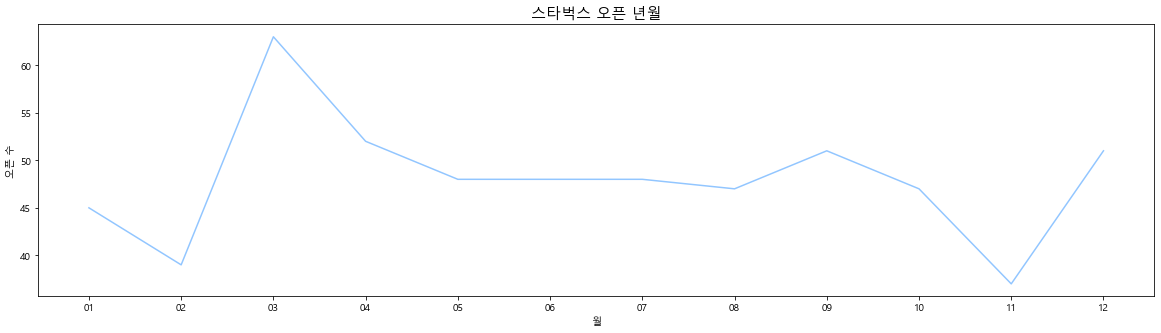

In [60]:
plt.figure(figsize=(20,5))
plt.style.use('seaborn-pastel')
plt.title("스타벅스 오픈 년월", fontsize=15) 
plt.xlabel("월")
plt.ylabel("오픈 수")
plt.plot(month_count.index, month_count.values)

plt.show()